In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [100]:
#loading the dataset
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [101]:
#keys of training data
print(X_train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [102]:
#summary of dataset
X_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jermyn, Miss. Annie",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [103]:
#check for any unusable values

print(pd.isnull(X_test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<font size = +3>
    Visualization
    </font>

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


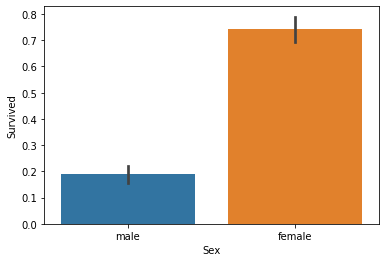

In [104]:
#Data Visualization, Sex feature

#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=X_train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", X_train["Survived"][X_train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", X_train["Survived"][X_train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

#we can see that the survival rate of females is very high

Survival rate for 1st class is: 62.96296296296296
Survival rate for 2nd class is: 47.28260869565217
Survival rate for 3rd class is: 24.236252545824847


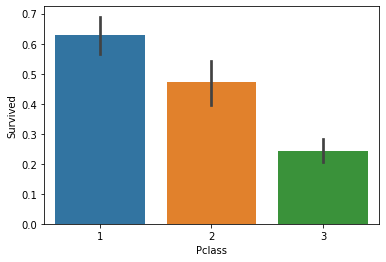

In [105]:
#data visualization, p class featrue

sns.barplot(x = 'Pclass', y = 'Survived', data = X_train)

print("Survival rate for 1st class is:", X_train['Survived'][X_train['Pclass'] == 1].value_counts(normalize = True)[1]*100)
print("Survival rate for 2nd class is:", X_train['Survived'][X_train['Pclass'] == 2].value_counts(normalize = True)[1]*100)
print("Survival rate for 3rd class is:", X_train['Survived'][X_train['Pclass'] == 3].value_counts(normalize = True)[1]*100)
#as expected higher class people's survival rate is very high

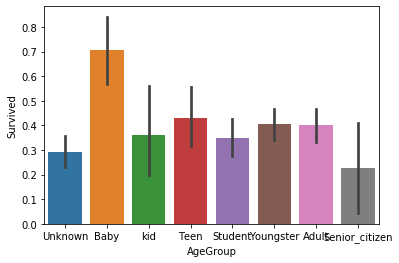

In [106]:
#data visualization, Age feature

#sort the ages into logical categories
X_train["Age"] = X_train["Age"].fillna(-0.5)#all na values replaced with - 0.5
X_test["Age"] = X_test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, 100 ]
labels = ['Unknown', 'Baby', 'kid', 'Teen', 'Student', 'Youngster', 'Adult', 'Senior_citizen']
X_train['AgeGroup'] = pd.cut(X_train["Age"], bins, labels = labels)
X_test['AgeGroup'] = pd.cut(X_test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=X_train)
plt.show() #we can see babies have the highest survival rate

<font size = +3>
    Cleaning our data


In [107]:
#our test data

X_test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Julian, Mr. Henry Forbes",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Youngster
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [108]:
#the cabin and ticket feature are not very useful so we can drop it
X_train = X_train.drop(["Cabin"],axis = 1)
X_train = X_train.drop(["Ticket"],axis = 1)
X_test = X_test.drop(['Cabin','Ticket'],axis=1)

In [109]:
#create a combined group of both datasets
combine = [X_train, X_test]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(X_train['Title'], X_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [110]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

X_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [111]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

X_train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Youngster,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Youngster,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Youngster,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.4583,Q,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Baby,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Youngster,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Teen,3


In [112]:
X_train['AgeGroup'][X_train["AgeGroup"]== 'Unknown'] ='Adult'
X_test['AgeGroup'][X_test['AgeGroup']=='Unknown'] = 'Adult'

In [113]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'kid': 2, 'Teen': 3, 'Student': 4, 'Youngster': 5, 'Adult': 6, 'Senior_citizen': 7}
X_train['AgeGroup'] = X_train['AgeGroup'].map(age_mapping)
X_test['AgeGroup'] = X_test['AgeGroup'].map(age_mapping)

X_train.head()

#dropping the Age feature for now, might change
X_train = X_train.drop(['Age'], axis = 1)
X_test = X_test.drop(['Age'], axis = 1)

In [114]:
X_train["AgeGroup"].unique()

array([4., 6., 5., 1., 3., 2., 7.])

In [115]:
#we have extracted titles so we can drop name feature
X_train = X_train.drop(['Name'],axis=1)
X_test = X_test.drop(["Name"],axis=1)
X_train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,male,1,0,7.2500,S,4.0,1
1,2,1,1,female,1,0,71.2833,C,6.0,3
2,3,1,3,female,0,0,7.9250,S,5.0,2
3,4,1,1,female,1,0,53.1000,S,5.0,3
4,5,0,3,male,0,0,8.0500,S,5.0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S,5.0,6
887,888,1,1,female,0,0,30.0000,S,4.0,2
888,889,0,3,female,1,2,23.4500,S,6.0,2
889,890,1,1,male,0,0,30.0000,C,5.0,1


In [116]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
X_train['Sex'] = X_train['Sex'].map(sex_mapping)
X_test['Sex'] = X_test['Sex'].map(sex_mapping)

X_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,4.0,1
1,2,1,1,1,1,0,71.2833,C,6.0,3
2,3,1,3,1,0,0,7.9250,S,5.0,2
3,4,1,1,1,1,0,53.1000,S,5.0,3
4,5,0,3,0,0,0,8.0500,S,5.0,1


In [117]:
#we can also drop Embarked value
X_train = X_train.drop(["Embarked"],axis = 1)
X_test = X_test.drop(["Embarked"],axis = 1)


In [118]:
#map Fare values into groups of numerical values
X_train['FareBand'] = pd.qcut(X_train['Fare'], 4, labels = [1, 2, 3, 4])
X_test['FareBand'] = pd.qcut(X_test['Fare'], 4, labels = [1, 2, 3, 4])

#drop Fare values
X_train = X_train.drop(['Fare'], axis = 1)
X_test = X_test.drop(['Fare'], axis = 1)

In [119]:
#reset index starting from 0
X_train.index = [i for i in range(0,891)]
X_test.index = [i for i in range(0,418)]
X_train = pd.DataFrame(X_train, dtype = int)
X_test['FareBand'] = X_test['FareBand'].fillna(3)


<font size = +3>
    Model test

In [120]:
predictors = X_train.drop(['Survived', 'PassengerId'],axis =1)
target = X_train["Survived"]
train_X, test_X, train_Y, test_Y = train_test_split(predictors, target, test_size=0.25, random_state = 0)


<font size = +3>
    Using logistic Regression

In [121]:
LR = LogisticRegression()
LR.fit(train_X, train_Y)

C:\Users\Saumitra23\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [122]:
#prediction of survival
pred_y1 = LR.predict(test_X)
pred_y1

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [123]:
#accuracy of our model\
print('accuracy percent of logistic regression model is:',accuracy_score(test_Y, pred_y1),'%')


accuracy percent of logistic regression model is: 0.7802690582959642 %


<font size = +3>
    Using KNN
    

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
KNN = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski',p =2)
KNN.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [126]:
pred_y2 = KNN.predict(test_X)
pred_y2

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1])

In [127]:
print('accuracy percent of knn model is:',accuracy_score(test_Y, pred_y2),'%')

accuracy percent of knn model is: 0.7713004484304933 %


<font size = +3>
    Support Vector Machines
    </font>

In [128]:
from sklearn.svm import SVC

In [129]:
Svm = SVC(kernel = 'rbf' )
Svm.fit(train_X, train_Y)

C:\Users\Saumitra23\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
pred_y3 = Svm.predict(test_X)

In [131]:
print('accuracy percent of svm model is:',accuracy_score(test_Y, pred_y3),'%')

accuracy percent of svm model is: 0.8026905829596412 %


<font size = +3>
    Creating submission file
    </font>

In [141]:
#set ids as PassengerId and predict survival 
ids = X_test['PassengerId']
predictions = Svm.predict(X_test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

In [156]:
X_test

,PassengerId,Pclass,Sex,SibSp,Parch,AgeGroup,Title,FareBand
0,892,3,0,0,0,5.0,1,1
1,893,3,1,1,0,6.0,3,1
2,894,2,0,0,0,7.0,1,2
3,895,3,0,0,0,5.0,1,2
4,896,3,1,1,1,4.0,3,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,0,6.0,1,2
414,1306,1,1,0,0,6.0,6,4
415,1307,3,0,0,0,6.0,1,1
416,1308,3,0,0,0,6.0,1,2


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
